In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_at = pd.read_csv('./data/atp/Total.csv')
df_ct = pd.read_csv('./data/challengers/Total.csv')

In [3]:
df_at.drop(columns='Unnamed: 0', inplace=True)
df_ct.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df_ct

,player_name,win,lost,match_played,total_win_percentage,total_lost_percentage
0,A Aguilar,1.0,2.0,3.0,0.333333,0.666667
1,A Benson,1.0,1.0,2.0,0.500000,0.500000
2,A Caulfield,0.0,1.0,1.0,0.000000,1.000000
3,A Hall,0.0,1.0,1.0,0.000000,1.000000
4,A Hernandez,0.0,2.0,2.0,0.000000,1.000000
...,...,...,...,...,...,...
9311,Zoran Sevcenko,0.0,2.0,2.0,0.000000,1.000000
9312,Zsolt Fule,0.0,1.0,1.0,0.000000,1.000000
9313,Zsolt Tatar,2.0,2.0,4.0,0.500000,0.500000
9314,Zsombor Piros,53.0,40.0,93.0,0.569892,0.430108


In [5]:
df_vs = pd.DataFrame()

Challenger vs Pro Tour

In [6]:
df_vs['player_name'] = df_ct['player_name']
df_vs['Challenger'] = 1
df_at['Pro Tour'] = 1

In [7]:
df_vs = pd.merge(df_vs, df_at[['player_name', 'Pro Tour']], on='player_name', how='left')

In [8]:
df_vs.fillna(0, inplace=True)

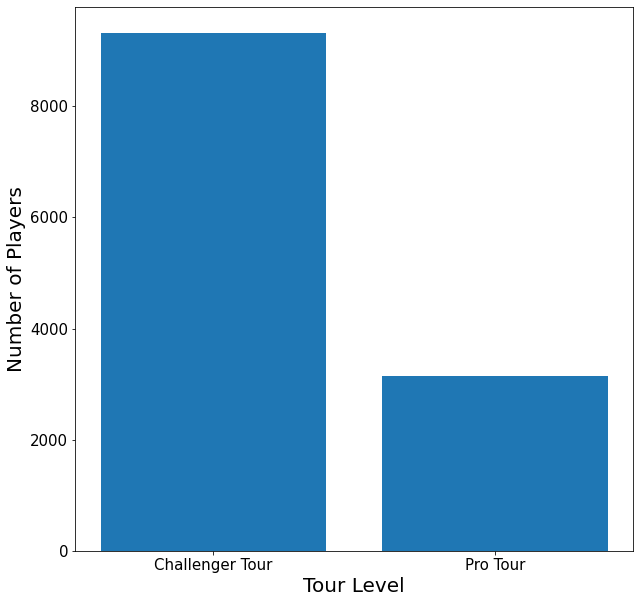

In [11]:
plt.figure(figsize=(10, 10))
tour = ['Challenger Tour', 'Pro Tour']
challenger = [df_vs['Challenger'].sum(), df_vs['Pro Tour'].sum()]
plt.bar(tour,challenger)
plt.xlabel('Tour Level',fontsize=20)
plt.ylabel('Number of Players',fontsize=20)
plt.tick_params(labelsize=15)

plt.savefig('./images/vs', bbox_inches='tight');

Top 25 Pro Tour

In [11]:
df_at.head(1)

,player_name,win,lost,match_played,total_win_percentage,total_lost_percentage,Tour
0,A D'Orsongna,0.0,1.0,1.0,0.0,1.0,1


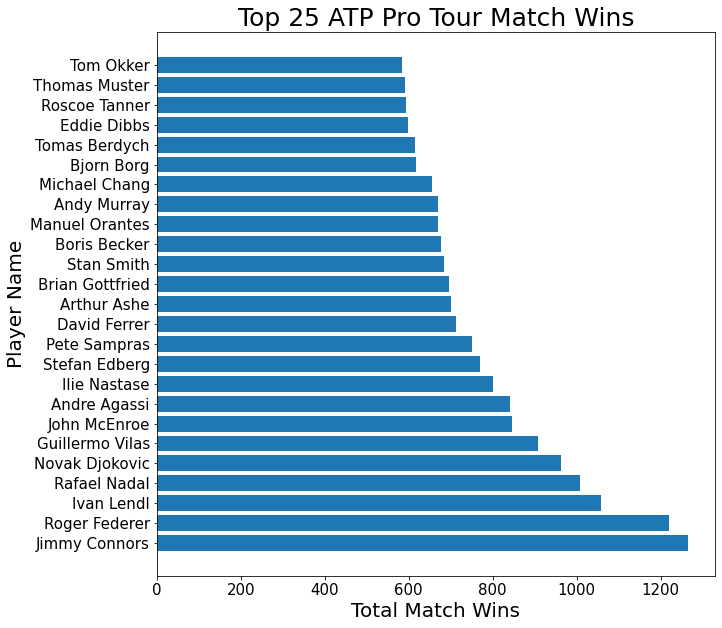

In [15]:
df_sort_a = df_at.sort_values('win', ascending=False).head(25)
plt.figure(figsize=(10, 10))
plt.title('Top 25 ATP Pro Tour Match Wins',fontsize=25)

plt.barh(y=df_sort_a['player_name'], width=df_sort_a['win']) 
plt.xlabel('Total Match Wins',fontsize=20)
plt.ylabel('Player Name',fontsize=20)
plt.tick_params(labelsize=15)

plt.savefig('./images/ATP_25', bbox_inches='tight');

Top 25 Challenger

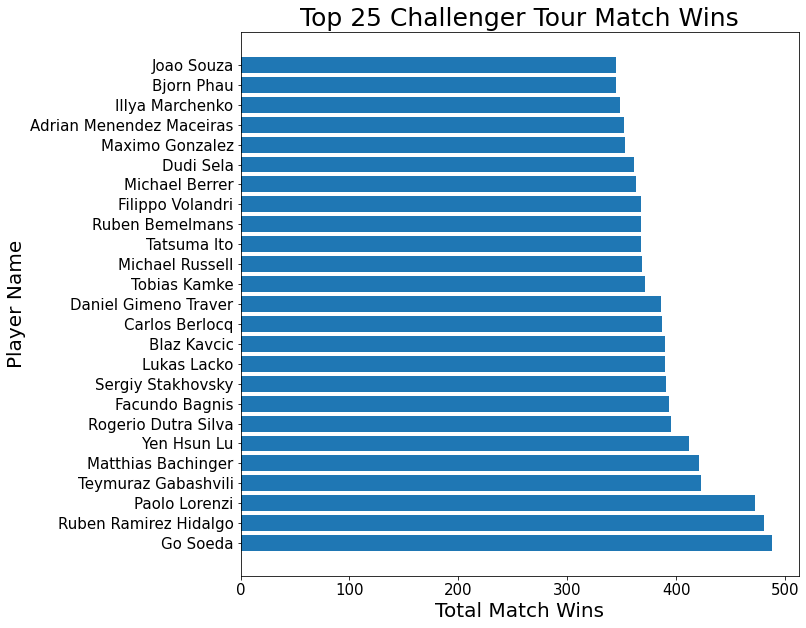

In [16]:
df_sort_c = df_ct.sort_values('win', ascending=False).head(25)

plt.figure(figsize=(10, 10))
plt.title('Top 25 Challenger Tour Match Wins',fontsize=25)

plt.barh(y=df_sort_c['player_name'], width=df_sort_c['win']) 
plt.xlabel('Total Match Wins',fontsize=20)
plt.ylabel('Player Name',fontsize=20)
plt.tick_params(labelsize=15)

plt.savefig('./images/Cha_25', bbox_inches='tight');